In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
plt.rc('font',family='Times New Roman')
from matplotlib.pyplot import MultipleLocator

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def border():
    bwith = 2 #边框宽度设置为2
    ax = plt.gca()#获取边框
    ax.tick_params(axis="x", direction="in", length=6, width=5, color="k")
    ax.tick_params(axis="x", direction="in", length=6, width=5, color="k")
    # ax.spines['top'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['right'].set_color('grey')  # 设置右‘脊梁’为无色
    # ax.spines['left'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['bottom'].set_color('none')  # 设置右‘脊梁’为无色
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

def axis(x=None, y=None):
    ax=plt.gca()
    if x:
        x_major_locator=MultipleLocator(x)
        ax.xaxis.set_major_locator(x_major_locator)
    if y:
        y_major_locator=MultipleLocator(y)
        ax.yaxis.set_major_locator(y_major_locator)


In [2]:
# a = 1, g = 0.001

# # agnews: 64 [4,8,16,32,64,100]
# # convergence accuracy
# x = list(range(5))# 时间(s)

# x_list = [4, 16, 32, 64, 100]
# y1 = np.array([0.9017582960696635, 0.9027632384090375, 0.9027582960696634, 0.9031901623911508, 0.9033148976229702]) * 100

# # correct ratio
# y2 = np.array([0.9382716049382714, 0.9460475340527734, 0.942580743069244, 0.9437799448701056, 0.9429904965922639]) * 100

# mnli: 392 [4,8,16,32,64,100]
# convergence accuracy
x = list(range(6))# 时间(s)

x_list = [4, 8, 16, 32, 64, 100]
y1 = np.array([0.5732309870550162, 0.6472916666666667, 0.6836771844660194, 0.5245327669902912, 0.5295400485436894, 0.5144046655879181])* 100

# correct ratio
y2 = np.array([0.7615675165250237, 0.8018207282913165, 0.8066591080876795, 0.7123195746596748, 0.7326246581908902, 0.721852461848732])* 100

# yahoo: 256 [4,16,32,64,100]
# convergence accuracy
x = list(range(5))# 时间(s)

x_list = [4,16,32,64,100]
y1 = np.array([0.6660666666666667, 0.6819, 0.6872999999999999, 0.6790166666666666, 0.6911333333333334])* 100

# correct ratio
y2 = np.array([0.9720101781170484, 0.9531198959770387, 0.9494569973533944, 0.938749710113794, 0.9361925604714533])* 100

# yahoo: 256 [4,16,32,64,100]
# convergence accuracy
x = list(range(6))# 时间(s)

x_list = [4,8,16,32,64,100]
y1 = np.array([0.5746400000000002, 0.6155799999999999, 0.61026, 0.61114, 0.61906, 0.58916])* 100

# correct ratio
y2 = np.array([0.936936936936937, 0.8861647361647361, 0.8923541247484909, 0.8767420853746084, 0.8756716625005222, 0.8707591023496767])* 100





/home/cdq/.conda/envs/ptpretrain/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.


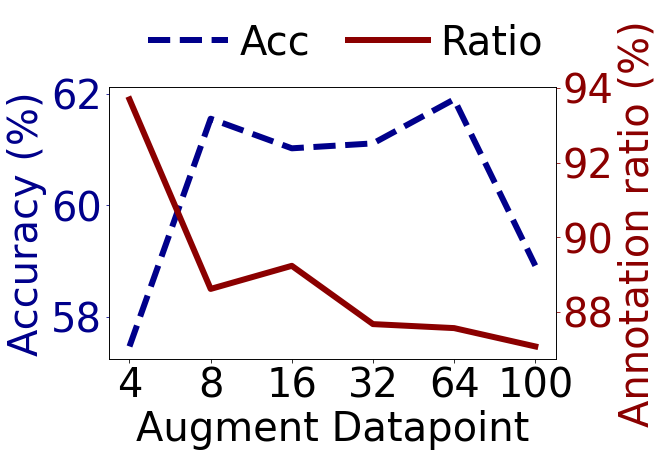

In [4]:
# Frequence-temperature
ft = 40

fig = plt.figure(figsize=(8,5))
# 下面的代码会导致多出来很奇怪的坐标轴刻度
# plt.axes().get_xaxis().set_visible(False)
# plt.axes().get_yaxis().set_visible(False)
# plt.grid(linestyle = "--") 

ax1 = fig.add_subplot(111)
ax1.plot(np.array(x), y1, linewidth = 6, color='darkblue', linestyle = "--", label="Acc")
axis(y=2)
# border()
# plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
plt.tick_params(axis='y',colors='darkblue')
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
ax1.set_ylabel("Accuracy (%)",  color='darkblue', fontsize=ft)
ax1.set_xlabel('Augment Datapoint',  fontsize=ft)
plt.legend(fontsize=ft, loc=3, bbox_to_anchor=(0.05, 1.03), ncol=1,borderaxespad = 0., frameon=False,handletextpad=0.3)

ax2 = ax1.twinx()  # this is the important function
ax2.plot(np.array(x), y2, 'r', linewidth = 6, color="darkred", label="Ratio")

axis(y=2)
plt.tick_params(axis='y',colors='darkred')
plt.xticks(x, x_list,fontsize=20)
plt.yticks(fontsize=ft)
ax2.set_ylabel("Annotation ratio (%)", color='darkred',fontsize=ft)


plt.legend(fontsize=ft, loc=3, bbox_to_anchor=(0.5, 1.03), ncol=1,borderaxespad = 0., frameon=False,handletextpad=0.3)
plt.savefig("../fig/eval-preliminary-acc&ratio-yelp.pdf", bbox_inches="tight")

